In [43]:
import tensorflow as tf

In [19]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from keras.layers import Dense
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
IMAGE_SIZE = [224, 224]

In [32]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 111s 1us/step


In [33]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [34]:
# useful for getting number of classes
folders = glob('C:/Users/bikash/Documents/workshop/Deep learning/Covid19/train/*')
print(len(folders))

3


In [45]:
from keras import layers
x = Flatten()(vgg.output)
x=layers.Dense(2048,activation="relu",name='fc1')(x)
x=layers.Dense(2048,activation="relu",name='fc2')(x)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [69]:
# Compiling the CNN
from keras import optimizers
from keras.optimizers import Adam
opt = adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [70]:
#Data Augmentation
train_data=ImageDataGenerator(rescale=1./255,preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [71]:
test_data=ImageDataGenerator(rescale=1./255,preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [72]:
training_set=train_data.flow_from_directory('C:/Users/bikash/Documents/workshop/Deep learning/Covid19/train',target_size = (224, 224),batch_size = 10)
test_set=test_data.flow_from_directory('C:/Users/bikash/Documents/workshop/Deep learning/Covid19/test',target_size = (224, 224),batch_size = 10)
# his = model.fit(training_set,epochs = 50,validation_data = test_set)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [73]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model_vgg19.h5', verbose=1, save_best_only=True)
callbacks = [checkpoint]

start = datetime.now()
his=model.fit_generator(training_set,validation_data=test_set,epochs=70,steps_per_epoch=3,validation_steps=30,callbacks=callbacks ,verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/70
3/3 [==============================] - 50s 17s/step - loss: 0.6693 - accuracy: 0.7143 - val_loss: 0.5012 - val_accuracy: 0.7183

Epoch 00001: val_loss improved from inf to 0.50117, saving model to model_vgg19.h5
Epoch 2/70
3/3 [==============================] - 52s 17s/step - loss: 0.6567 - accuracy: 0.7667 - val_loss: 0.6213 - val_accuracy: 0.7676

Epoch 00002: val_loss did not improve from 0.50117
Epoch 3/70
3/3 [==============================] - 54s 18s/step - loss: 0.4087 - accuracy: 0.8667 - val_loss: 0.9475 - val_accuracy: 0.8627

Epoch 00003: val_loss did not improve from 0.50117
Epoch 4/70
3/3 [==============================] - 54s 18s/step - loss: 0.2063 - accuracy: 0.9333 - val_loss: 0.4162 - val_accuracy: 0.8321

Epoch 00004: val_loss improved from 0.50117 to 0.41616, saving model to model_vgg19.h5
Epoch 5/70
3/3 [==============================] - 54s 18s/step - loss: 0.2083 - accuracy: 0.9000 - val_loss: 0.5371 - val_accuracy: 0.8099

Epoch 00005: val_loss did no


Epoch 00042: val_loss did not improve from 0.01132
Epoch 43/70
3/3 [==============================] - 54s 18s/step - loss: 0.1789 - accuracy: 0.9667 - val_loss: 0.4658 - val_accuracy: 0.8592

Epoch 00043: val_loss did not improve from 0.01132
Epoch 44/70
3/3 [==============================] - 55s 18s/step - loss: 0.1150 - accuracy: 0.9667 - val_loss: 0.3007 - val_accuracy: 0.8732

Epoch 00044: val_loss did not improve from 0.01132
Epoch 45/70
3/3 [==============================] - 54s 18s/step - loss: 0.2403 - accuracy: 0.9000 - val_loss: 0.0843 - val_accuracy: 0.9014

Epoch 00045: val_loss did not improve from 0.01132
Epoch 46/70
3/3 [==============================] - 53s 18s/step - loss: 0.1628 - accuracy: 0.9333 - val_loss: 0.4282 - val_accuracy: 0.9000

Epoch 00046: val_loss did not improve from 0.01132
Epoch 47/70
3/3 [==============================] - 52s 17s/step - loss: 0.1159 - accuracy: 0.9524 - val_loss: 0.1451 - val_accuracy: 0.9190

Epoch 00047: val_loss did not improve f

In [74]:
loss,acc = model.evaluate(training_set,verbose=0)
print("Loss on train data:",(loss*100))
print("Accuracy on train data:",(acc*100))

Loss on train data: 21.606922149658203
Accuracy on train data: 90.83665609359741


In [75]:
loss,acc = model.evaluate(test_set,verbose=0)
print("Loss on test data:",(loss*100))
print("Accuracy on test data:",(acc*100))

Loss on test data: 6.126995384693146
Accuracy on test data: 86.36363744735718


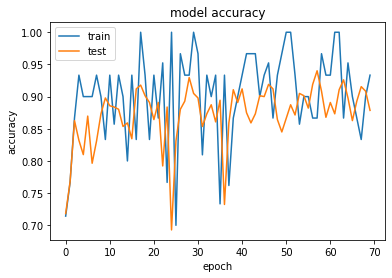

In [76]:
# summarize history for accuracy
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

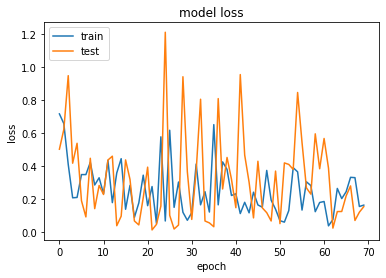

In [77]:
# summarize history for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(224, 224, 3)


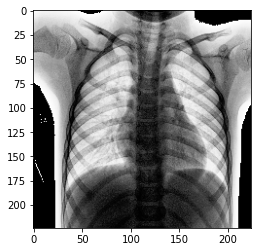

In [85]:
test_image = image.load_img('C:/Users/bikash/Documents/workshop/Deep learning/Covid19/1.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
print(test_image.shape)
plt.imshow((test_image*255).astype(np.uint8))

In [86]:
training_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [87]:
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'Covid'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'Normal'
    print(prediction)
else:
    prediction = 'Viral Pneumonia'
    print(prediction)  

Normal
